In [35]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_excel("/content/drive/My Drive/Project_MAIN/Reports/rapor13.xls",sheet_name="Rapor")
df = pd.DataFrame(data=df.values,columns=["Dosya Dizini","Class","R1","G1","B1","R2","G2","B2","C1","M1","Y1","K1","C2","M2","Y2","K2","PERCENT1","PERCENT2","Renk Sayisi"])

In [37]:
df

,Dosya Dizini,Class,R1,G1,B1,R2,G2,B2,C1,M1,Y1,K1,C2,M2,Y2,K2,PERCENT1,PERCENT2,Renk Sayisi
0,/content/drive/My Drive/rtest3saves/t-shirt/0.jpg,t-shirt,46.6353,36.1745,40.9639,200.974,141.48,151.384,0,0.224311,0.121613,0.817116,0,0.296028,0.24675,0.211866,0.71711,0.28289,2
1,/content/drive/My Drive/rtest3saves/t-shirt/1.jpg,t-shirt,231.318,214.605,220.917,175.876,161.804,144.893,0,0.0722508,0.044961,0.0928721,0,0.0800111,0.176162,0.31029,0.99061,0.00939031,2
2,/content/drive/My Drive/rtest3saves/t-shirt/2.jpg,t-shirt,240.218,239.218,243.575,195.142,194.303,194.064,0.0137852,0.0178893,0,0.0448026,0,0.00429971,0.00552633,0.234735,0.978123,0.0218773,2
3,/content/drive/My Drive/rtest3saves/t-shirt/3.jpg,t-shirt,239.732,160.426,7.65761,81.9381,58.0781,24.8647,0,0.330814,0.968058,0.0598727,0,0.291195,0.696543,0.678674,0.950869,0.0491309,2
4,/content/drive/My Drive/rtest3saves/t-shirt/4.jpg,t-shirt,227.113,224.15,223.849,77.2667,68.6499,56.3197,0,0.0130467,0.0143736,0.109359,0,0.111521,0.2711,0.696993,0.958797,0.0412034,2
5,/content/drive/My Drive/rtest3saves/t-shirt/5.jpg,t-shirt,224.989,225.038,230.279,56.329,55.2136,60.6184,0.0229703,0.0227591,0,0.0969451,0.0707611,0.0891616,0,0.762281,0.847935,0.152065,2
6,/content/drive/My Drive/rtest3saves/t-shirt/6.jpg,t-shirt,64.518,33.2275,39.4591,165.862,159.921,160.821,0,0.484988,0.388402,0.746988,0,0.0358177,0.030396,0.34956,0.978378,0.0216225,2
7,/content/drive/My Drive/rtest3saves/t-shirt/7.jpg,t-shirt,169.37,152.955,120.097,76.3819,70.7882,62.8805,0,0.0969221,0.29092,0.335802,0,0.0732324,0.176762,0.700463,0.532648,0.467352,2
8,/content/drive/My Drive/rtest3saves/gomlek/8.jpg,gomlek,43.6791,43.5632,45.6545,164.813,163.83,160.712,0.0432696,0.0458068,0,0.820963,0,0.00596549,0.0248851,0.353673,0.981486,0.0185139,2
9,/content/drive/My Drive/rtest3saves/gomlek/9.jpg,gomlek,233.152,232.706,237.413,214.687,214.738,216.019,0.0179489,0.0198249,0,0.0689684,0.00616428,0.00593034,0,0.152867,0.983638,0.0163617,2


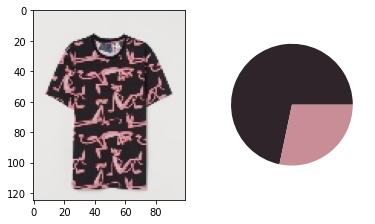

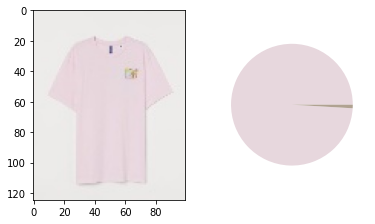

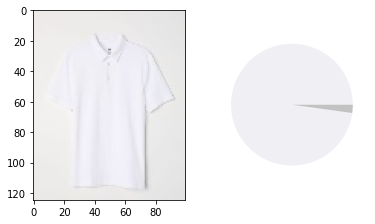

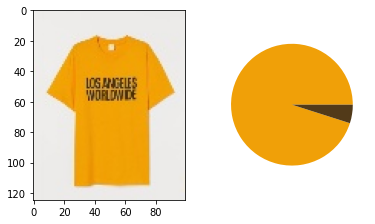

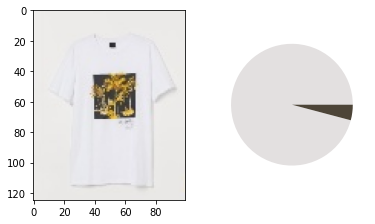

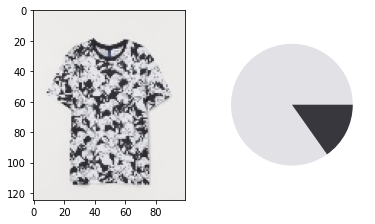

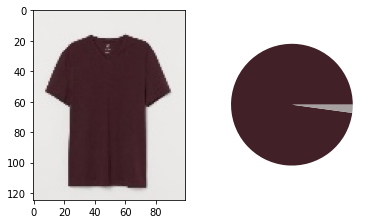

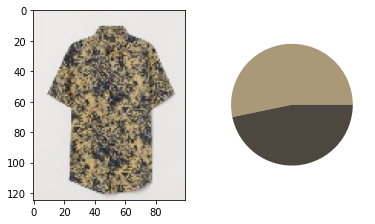

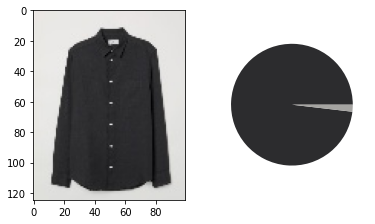

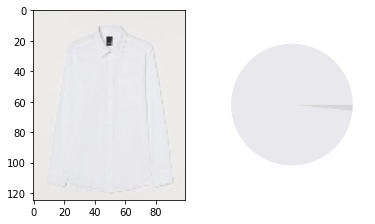

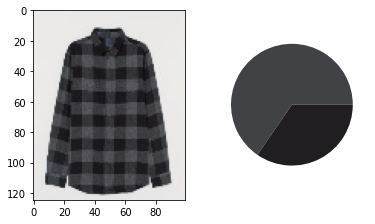

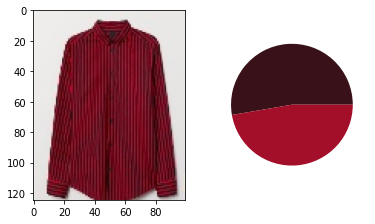

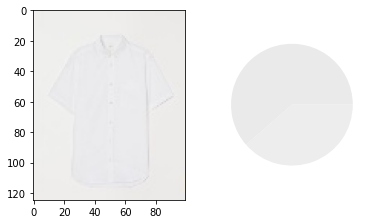

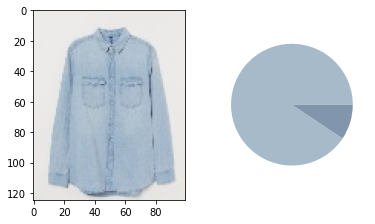

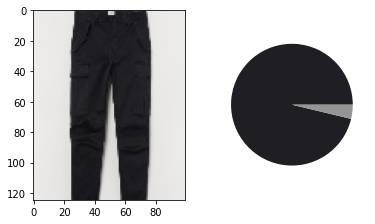

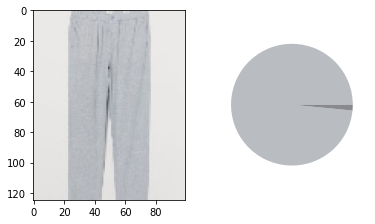

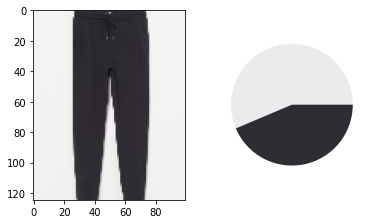

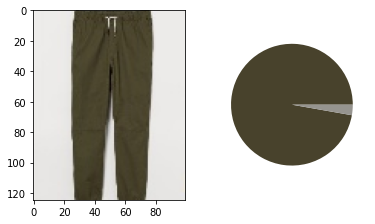

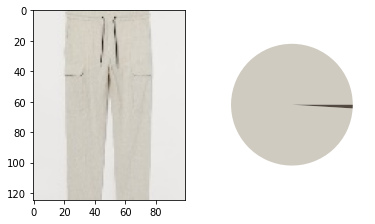

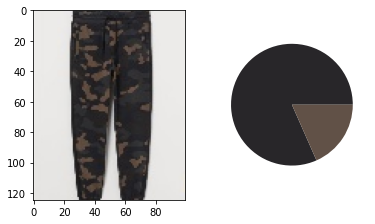

In [38]:
n,m = df.shape
for i in range(0,n,1):
  array1 = df.iloc[i,:].values
  address = array1[0]
  image = cv2.imread(address)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  renk_sayisi = array1[m-1]
  if (renk_sayisi==1):
    colors = np.array([float(array1[2]),float(array1[3]),float(array1[4])])/255
    colors = colors.reshape((1,3))
    hist = np.array([1.0],dtype=np.float32)
  else:
    colors = np.array([[float(array1[2]),float(array1[3]),float(array1[4])],[float(array1[5]),float(array1[6]),float(array1[7])]])/255
    colors = colors.reshape((2,3))
    hist = np.array([float(array1[m-3]),float(array1[m-2])])

  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.subplot(1,2,2)
  plt.pie(x = hist,colors=colors)
  plt.show()

In [39]:
array2 = df.iloc[1,:]

In [40]:
image = cv2.imread(str(array2[0]))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
point1 = np.array(image[20,40,:])
point2 = np.array(image[20,80,:])

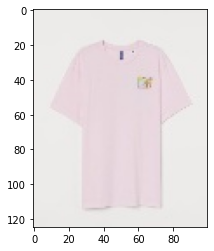

In [41]:
plt.imshow(image)

In [42]:
roi_test = np.ones((30,30,3))
roi_test[:,:,:] = point1

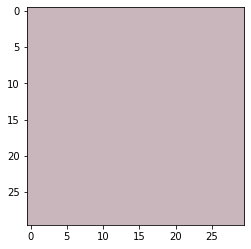

In [43]:
plt.imshow(roi_test/255)

In [44]:
color_codes = np.array([[float(array2[2]),float(array2[3]),float(array2[4])],[float(array2[5]),float(array2[6]),float(array2[7])]])

In [45]:
color_codes[0]

array([231.31761187, 214.60473693, 220.91733596])

In [46]:
point1

array([201, 182, 188], dtype=uint8)

In [47]:
print(str(point1[0]-color_codes[0,0]))
print(str(point1[1]-color_codes[0,1]))
print(str(point1[2]-color_codes[0,2]))

-30.317611866904116
-32.604736928384824
-32.917335955842105


In [48]:
def cvt_a(a):
  if (a<0):
    return -a
  else:
    return a

In [49]:
n,m = df.shape

test_results = np.array([[0],[0],[0]])

for i in range(0,n,1):

  array2 = df.iloc[1,:]

  image = cv2.imread(str(array2[0]))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  
  point1 = np.array(image[20,40,:])
  point2 = np.array(image[20,80,:])

  color_codes = np.array([[float(array2[2]),float(array2[3]),float(array2[4])],[float(array2[5]),float(array2[6]),float(array2[7])]])

  a = point1[0]-color_codes[0,0]

  a = cvt_a(a)

  test_results[0,0] += a

  a = point1[1]-color_codes[0,1]

  a = cvt_a(a)

  test_results[1,0] += a

  a = point1[2]-color_codes[0,2]

  a = cvt_a(a)

  test_results[2,0] += a

In [50]:
test_results = test_results / n

In [51]:
test_results

array([[30.],
       [32.],
       [32.]])